The whole example from https://pypi.python.org/pypi/pydy

In [1]:
from sympy import symbols
import sympy.physics.mechanics as me

mass, stiffness, damping, gravity = symbols('m, k, c, g')

position, speed = me.dynamicsymbols('x v')
positiond = me.dynamicsymbols('x', 1)
force = me.dynamicsymbols('F')

ceiling = me.ReferenceFrame('N')

origin = me.Point('origin')
origin.set_vel(ceiling, 0)

center = origin.locatenew('center', position * ceiling.x)
center.set_vel(ceiling, speed * ceiling.x)

block = me.Particle('block', center, mass)

kinematic_equations = [speed - positiond]

force_magnitude = mass * gravity - stiffness * position - damping * speed + force
forces = [(center, force_magnitude * ceiling.x)]

particles = [block]

kane = me.KanesMethod(ceiling, q_ind=[position], u_ind=[speed],
                      kd_eqs=kinematic_equations)
kane.kanes_equations(forces, particles)

(Matrix([[-c*v(t) + g*m - k*x(t) + F(t)]]), Matrix([[-m*Derivative(v(t), t)]]))

In [2]:
from numpy import array, linspace, sin
from pydy.system import System

sys = System(kane,
             constants={mass: 1.0, stiffness: 1.0,
                        damping: 0.2, gravity: 9.8},
             specifieds={force: lambda x, t: sin(t)},
             initial_conditions={position: 0.1, speed: -1.0},
             times=linspace(0.0, 10.0, 1000))

/home/ondrej/.hashdist/bld/profile/y5xkyowofage/lib/python2.7/site-packages/pydy/system.py:102: PyDyFutureWarning: PyDy System is experimental and may change in the future.
  warnings.warn(msg, PyDyFutureWarning)


In [3]:
y = sys.integrate()

In [4]:
%matplotlib inline

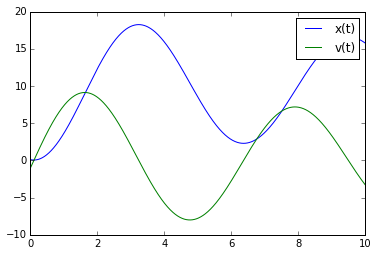

In [5]:
import matplotlib.pyplot as plt

plt.plot(sys.times, y)
plt.legend((str(position), str(speed)))
plt.show()

# Equations for pendulum

In [6]:
from pydy.models import n_link_pendulum_on_cart
sys = n_link_pendulum_on_cart(2) # Change to 20
sys.coordinates
sys.eom_method.q
sys.eom_method.u
sys.states
import sympy as sm
x = sm.Matrix(sys.states)
F = sys.eom_method.forcing
x

Matrix([
[q0(t)],
[q1(t)],
[q2(t)],
[u0(t)],
[u1(t)],
[u2(t)]])

In [7]:
#F

In [8]:
#F.jacobian(x)

Convert to SymEngine

In [9]:
import symengine as se

In [10]:
F_se = se.sympify(F)
x_se = se.sympify(x)

In [11]:
# segfaults...
# F_se.det()

In [12]:
F_se.get(0, 0)

l0*m1*cos(q1(t))*u1(t)**2 + l1*m2*cos(q2(t))*u2(t)**2 + l0*m2*cos(q1(t))*u1(t)**2 + F(t)

SymPy differentiation:

In [13]:
%time a = F[0, 0].diff(x[1, 0])

CPU times: user 21.4 ms, sys: 87 µs, total: 21.5 ms
Wall time: 19.7 ms


In [14]:
a

-l0*m1*u1(t)**2*sin(q1(t)) - l0*m2*u1(t)**2*sin(q1(t))

In [15]:
q1_se = se.Symbol("q1")
t_se = se.Symbol("t")
q1t_se = se.function_symbol("q1", t_se)

In [16]:
%time tmp = F_se.get(0, 0).subs(q1t_se, q1_se)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 177 µs


SymEngine differentation:

In [17]:
%time a2 = tmp.diff(q1_se)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 129 µs


In [18]:
a2

-l0*m1*sin(q1)*u1(t)**2 - l0*m2*sin(q1)*u1(t)**2